In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

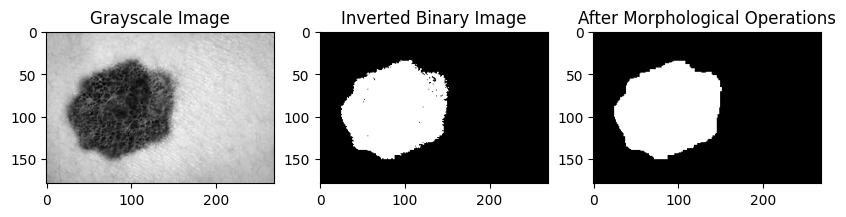

In [ ]:
# Load the image in RGB format
img = cv2.imread('melanome.jpg')

# Convert the RGB image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to convert the image to a binary image
# The threshold value can be adjusted depending on the contrast of the image
ret, binary_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)

# Invert the binary image to make the melanoma cells white and background black
inverted_binary_img = cv2.bitwise_not(binary_img)

# Morphological operations (optional based on the application):
# Perform closing (dilate then erode) to remove noise and fill gaps
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(inverted_binary_img, cv2.MORPH_CLOSE, kernel)

# Perform opening (erode then dilate) to remove small objects (if needed)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

# Display the results using Matplotlib
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.title("Grayscale Image")
plt.imshow(gray_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Inverted Binary Image")
plt.imshow(inverted_binary_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("After Morphological Operations")
plt.imshow(opening, cmap='gray')

plt.show()

Trying Opening & Closing with different filter (kernel) shapes and size

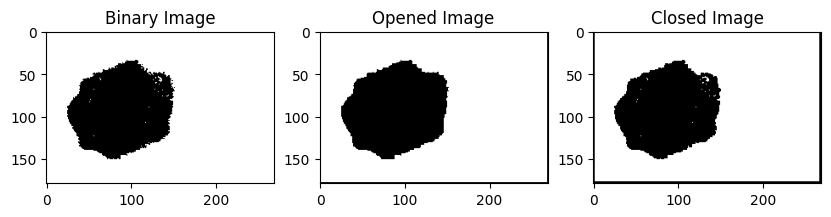

In [ ]:
# Load the binary image (assuming you've already binarized and inverted the image)
img = cv2.imread('melanome.jpg', cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold to ensure it's a binary image (if it's not already)
ret, binary_img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

# Define a kernel (structuring element) for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Step 1: Erosion (erode the binary image)
def erode(image, kernel):
    img_eroded = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extracting the 3x3 region around the current pixel
            region = image[i-1:i+2, j-1:j+2]
            # Apply the erosion rule: if all pixels under the kernel are 255 (white), the center pixel stays white
            if np.all(region == kernel * 255):
                img_eroded[i, j] = 255
            else:
                img_eroded[i, j] = 0
    return img_eroded

# Step 2: Dilation (dilate the binary image)
def dilate(image, kernel):
    img_dilated = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extracting the 3x3 region around the current pixel
            region = image[i-1:i+2, j-1:j+2]
            # Apply the dilation rule: if any pixel under the kernel is white, the center pixel becomes white
            if np.any(region == 255):
                img_dilated[i, j] = 255
            else:
                img_dilated[i, j] = 0
    return img_dilated

# Opening: Erosion followed by Dilation
eroded_img = erode(binary_img, kernel)
opened_img = dilate(eroded_img, kernel)

# Closing: Dilation followed by Erosion
dilated_img = dilate(binary_img, kernel)
closed_img = erode(dilated_img, kernel)

# Display the original binary, opened, and closed images
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Opened Image")
plt.imshow(opened_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Closed Image")
plt.imshow(closed_img, cmap='gray')

plt.show()
